# Predicting Fuel efficiency using Ridge regression 

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn. metrics import r2_score, mean_absolute_error, mean_squared_error

### Reading the data

In [13]:
df = pd.read_csv('data/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.shape

(398, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


### Data Preprocessing

In [5]:
#checking for null values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [9]:
#cleaning column horsepower
df[df.horsepower.str.isdigit()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [15]:
#replacing '?' with nan
df['horsepower'] = df.horsepower.replace('?', np.nan)

In [16]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [17]:
#filling null values with median
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

In [18]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [19]:
#checking datatypes of features
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [20]:
#converting horsepower to numerical varialbe
df['horsepower'] = df['horsepower'].astype('float64')

In [21]:
#dropping car name column
df = df.drop('car name', axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


### Exploratory data analysis

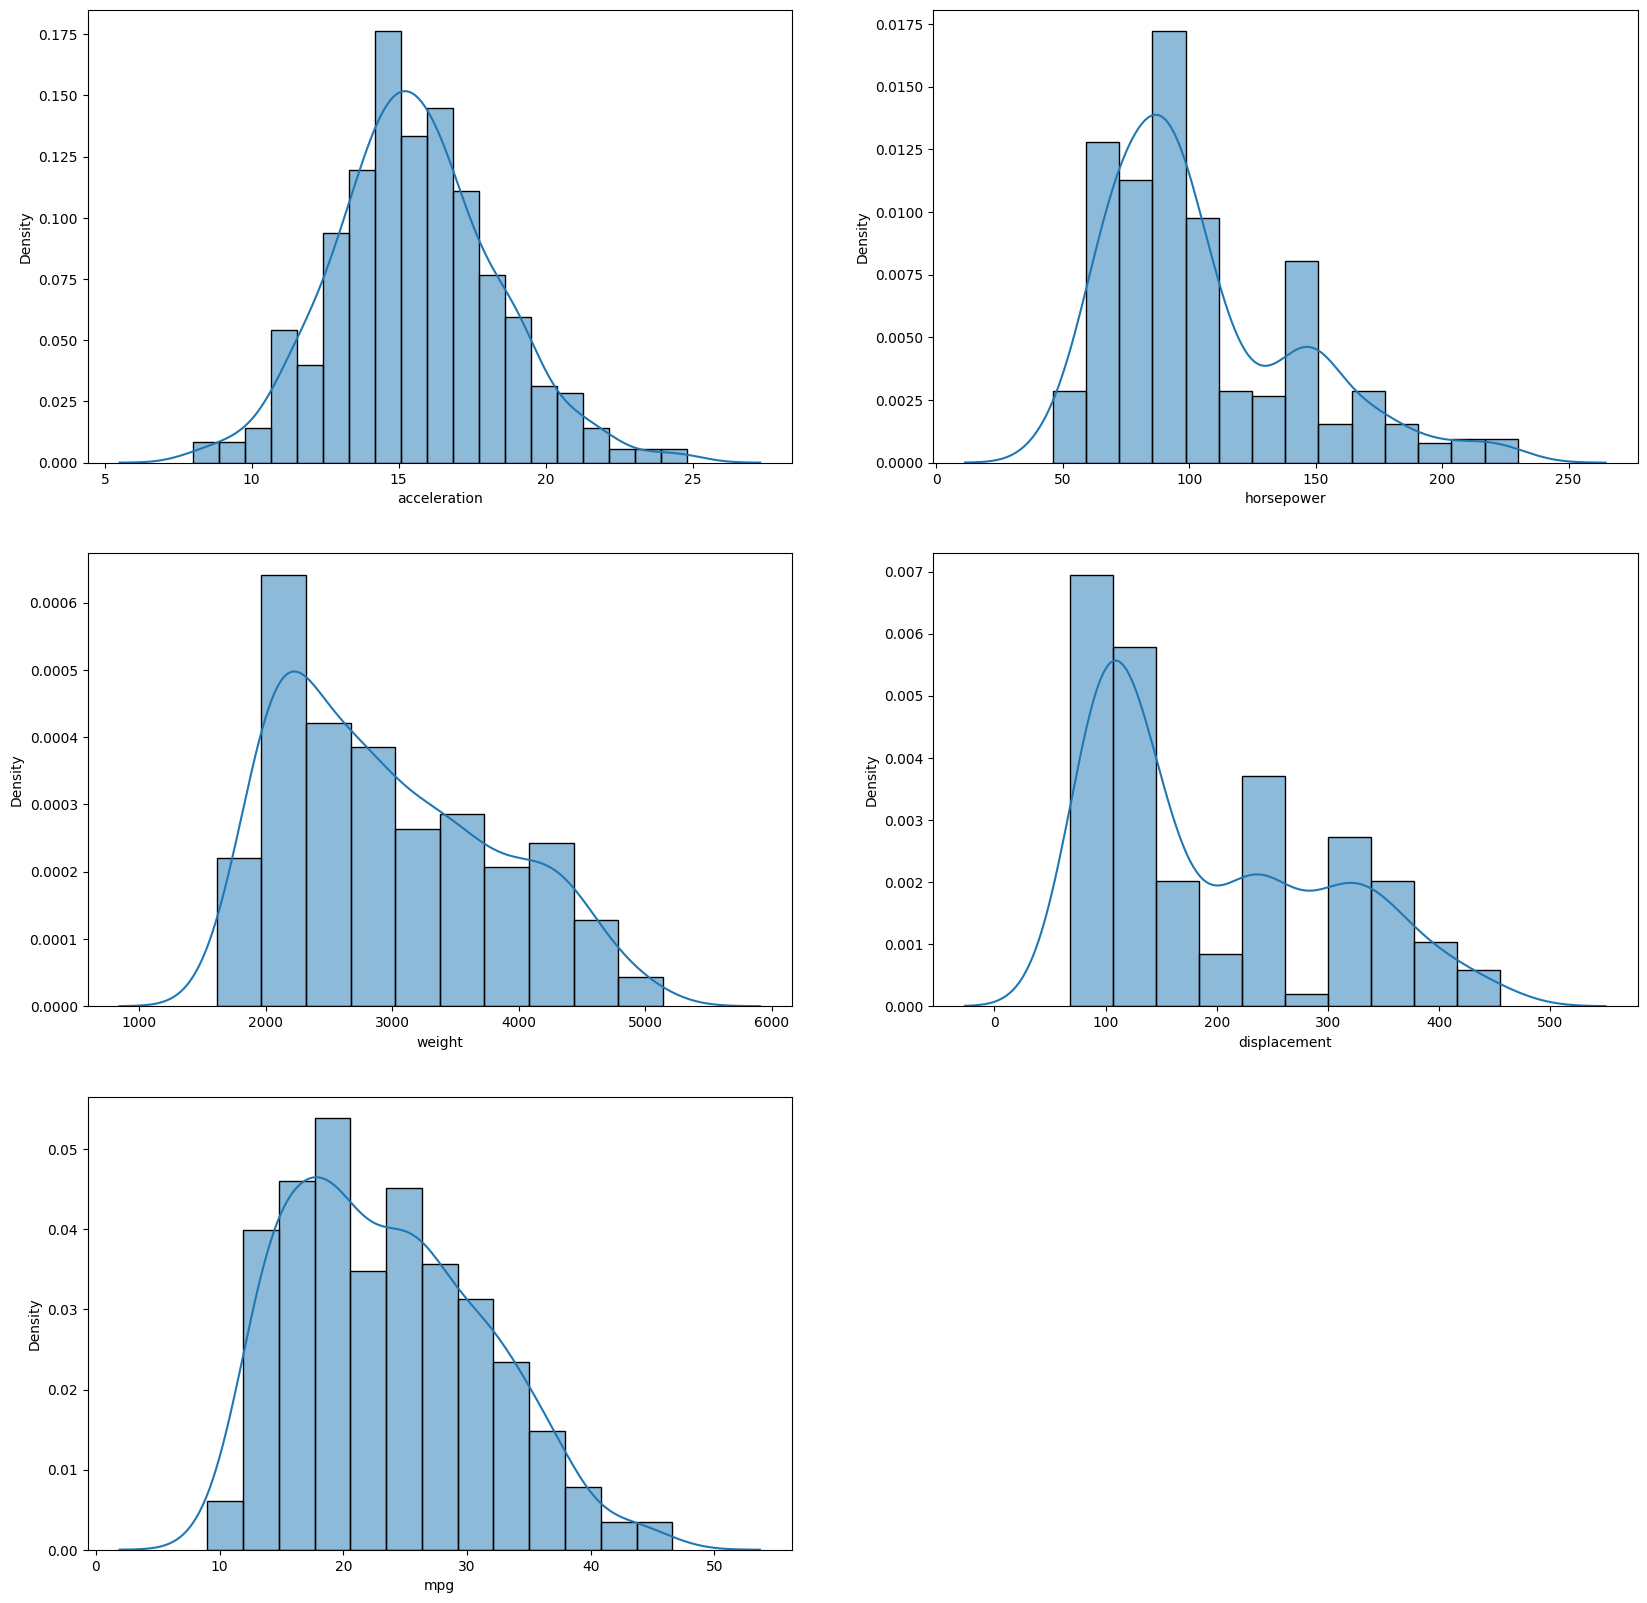

In [33]:
#plotting distribution of features
num_cols = ["acceleration", "horsepower", "weight", "displacement", "mpg"]

plt.figure(figsize=(20,20))
for i in range(1, len(num_cols)+1):
    plt.subplot(3, 2, i)
    sns.histplot(df[num_cols[i-1]], kde=True,
    stat="density", kde_kws=dict(cut=3))

* The distribution of acceleraiton is normal
* horsepower follows a righskewed distribution which means small number of cars have high horesepower
* The distirbutions of weigh, displacement and mpg are also right skewed

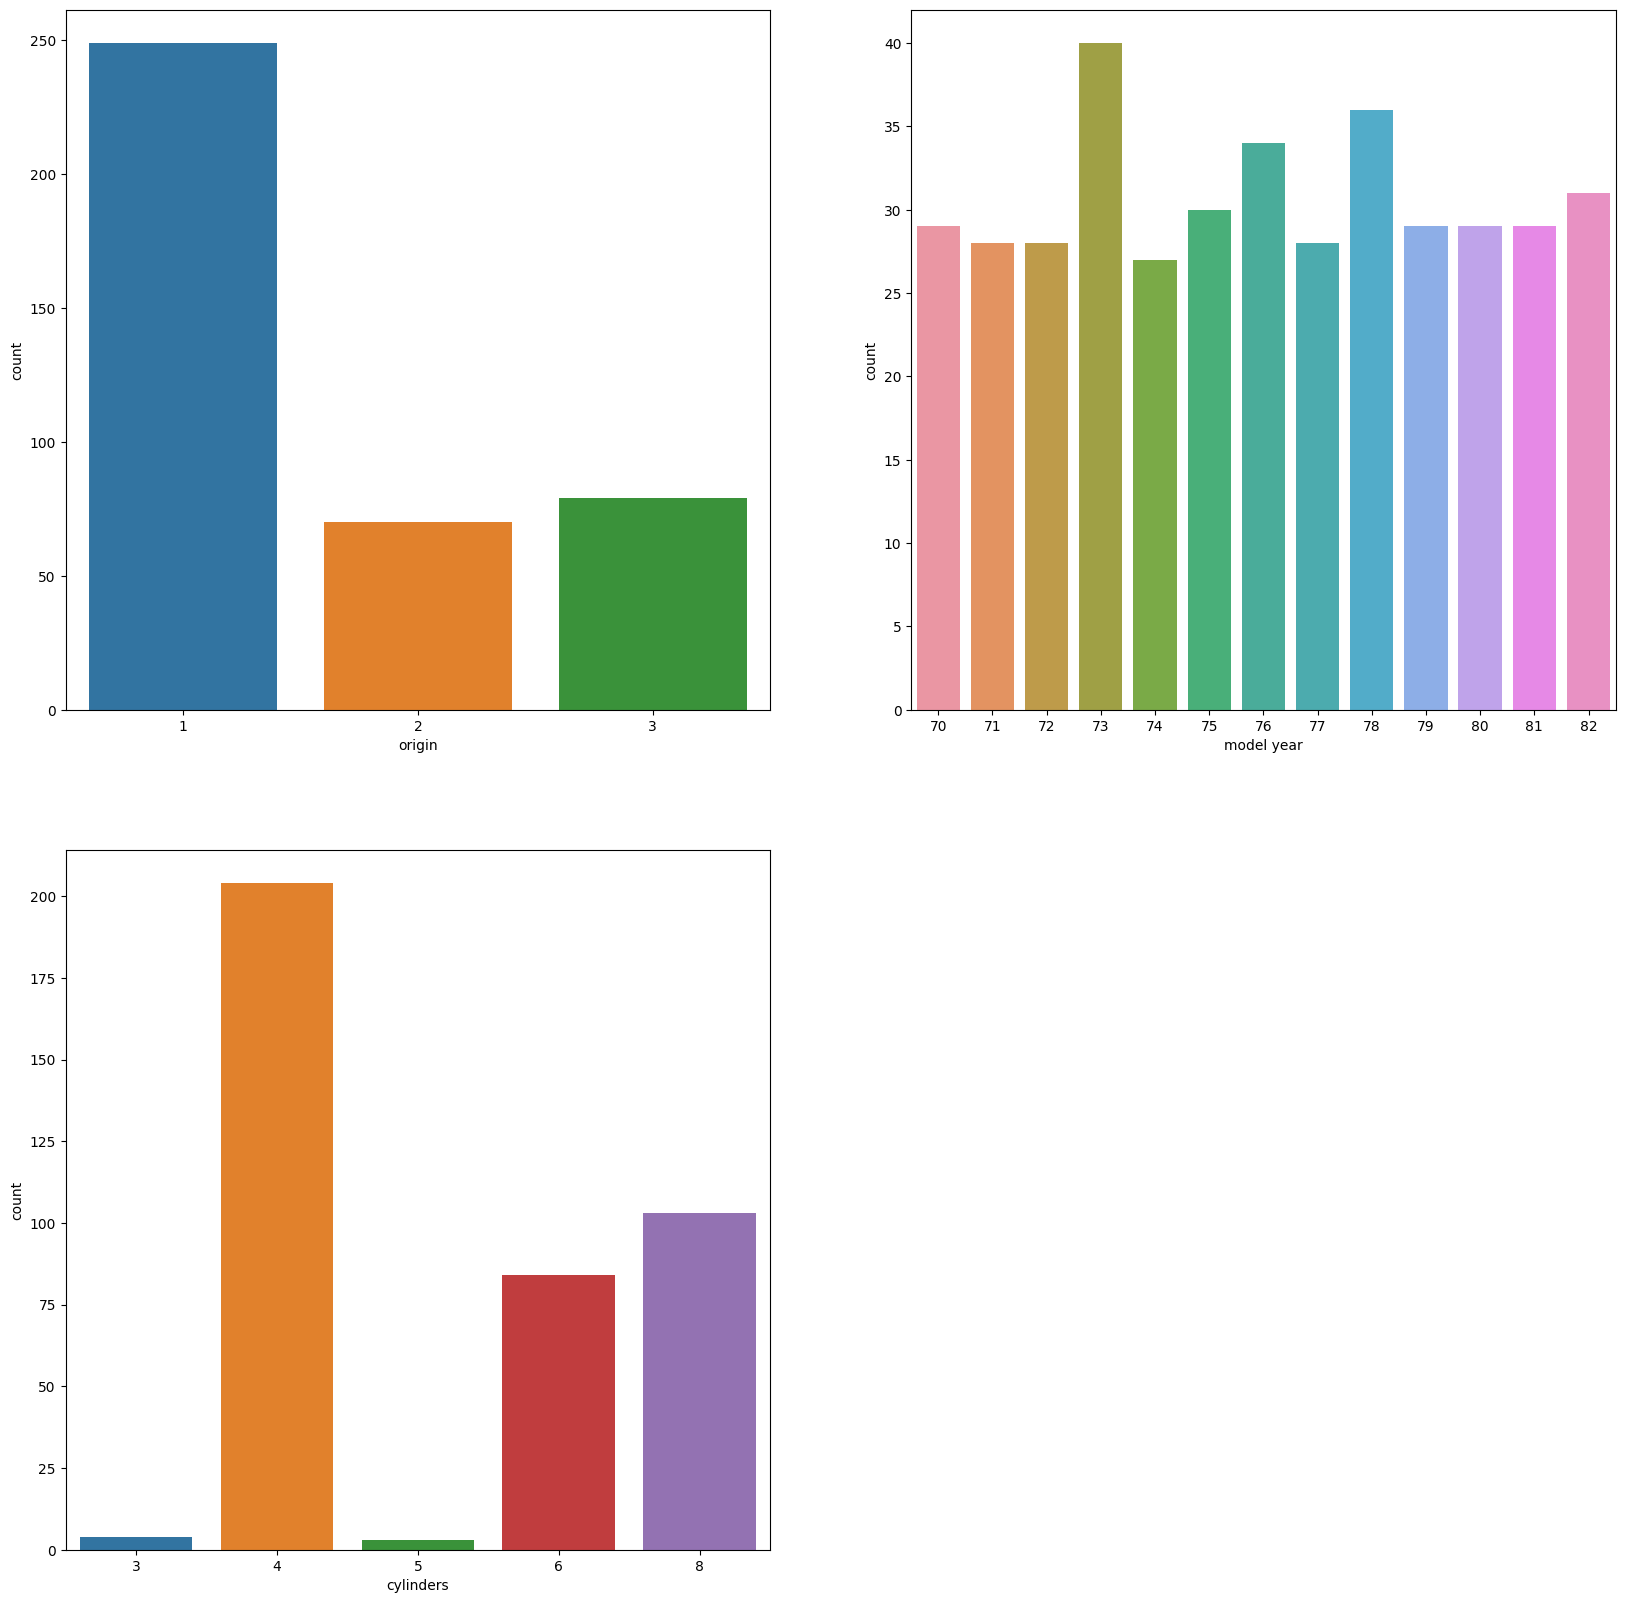

In [37]:
cat_cols = ["origin", "model year", "cylinders"]

plt.figure(figsize=(20,20))
for i in range(1, len(cat_cols)+1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=cat_cols[i-1])

* Most of the cars are of origin 1 (American)
* Majority of cars have 4 cylinders
* Number of cars with 3 or 5 cylinders are very low
* Year 1973 has more number of cars

<AxesSubplot: >

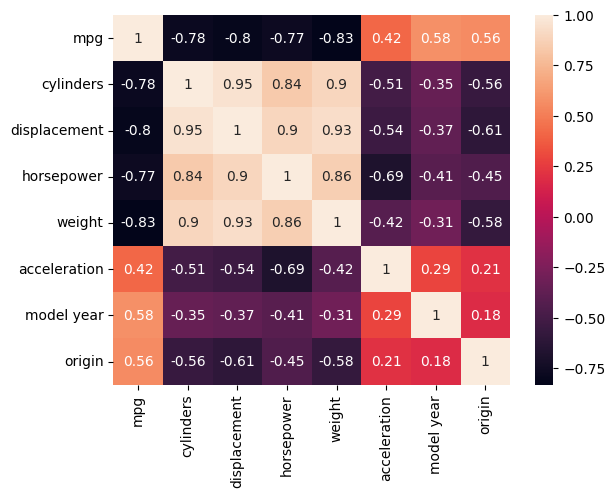

In [39]:
#heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True)

* mpg has a strong negative correlation with cylinders, horespower, displacement and weight
* acceleration and horsepower seems to have a negative correlation
* cylinders have strong positive correlation with displacement and weight
* diplacement has strong positve correlationwith horsepower

### Seperating dependent and independent variables 

In [47]:
X = df.drop('mpg', axis=1)
y = df[['mpg']]

In [ ]:
#standrdizing the data
from sklearn import preprocessing

X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)

### Model training

In [50]:
#splitting dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=1)

* #### Linear regression model

In [51]:
lr = LinearRegression()
lr.fit(X_train, y_train)

for i, col in enumerate(X_train.columns):
    print('The coefficent for {} is {}'.format(col, lr.coef_[0][i]))

The coefficent for cylinders is -0.08561436895562707
The coefficent for displacement is 0.30441822535930246
The coefficent for horsepower is -0.09718466302484263
The coefficent for weight is -0.7628632829136761
The coefficent for acceleration is 0.021591275172924626
The coefficent for model year is 0.3749408074118714
The coefficent for origin is 0.12302637024556856


#### Model evaluation

In [53]:
y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('R2 score: ', r2)
print('Mean absolute: ', mae)
print('Mean squared error: ', mse)
print('Root mean squared error: ', rmse)

R2 score:  0.8472274567567305
Mean absolute:  0.2960772496395954
Mean squared error:  0.14658208429020428
Root mean squared error:  0.38286039791313525


* #### Ridge regression

In [67]:
#finding value for alpha
from sklearn.model_selection import GridSearchCV

ridge_regressor = Ridge()

parameters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv = GridSearchCV(ridge_regressor, parameters, scoring='neg_mean_squared_error', cv=5)
ridgecv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [68]:
ridgecv.best_params_

{'alpha': 1}

In [69]:
ridgecv.best_score_

-0.21128276888504183

In [71]:
y_pred = ridgecv.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('R2 score: ', r2)
print('Mean absolute: ', mae)
print('Mean squared error: ', mse)
print('Root mean squared error: ', rmse)

R2 score:  0.8480557970107935
Mean absolute:  0.2953247183707148
Mean squared error:  0.14578730900948722
Root mean squared error:  0.3818210431726979


In [76]:
ridge1 = Ridge(alpha=1)

ridge1.fit(X_train, y_train)
for i, col in enumerate(X_train.columns):
    print('The coefficent for {} is {}'.format(col, ridge1.coef_[0][i]))

The coefficent for cylinders is -0.07121896528742029
The coefficent for displacement is 0.2545922110228855
The coefficent for horsepower is -0.10562163061671638
The coefficent for weight is -0.7257272526332574
The coefficent for acceleration is 0.013936782414360338
The coefficent for model year is 0.37123495928305966
The coefficent for origin is 0.1203017141809628


In [77]:
ridge1 = Ridge(alpha=100000)

ridge1.fit(X_train, y_train)
for i, col in enumerate(X_train.columns):
    print('The coefficent for {} is {}'.format(col, ridge1.coef_[0][i]))

The coefficent for cylinders is -0.0020812622699733843
The coefficent for displacement is -0.0021491698921673303
The coefficent for horsepower is -0.0020869049192098863
The coefficent for weight is -0.002272781885832798
The coefficent for acceleration is 0.0011095344715934758
The coefficent for model year is 0.0015994823467540237
The coefficent for origin is 0.001432841735828801
